# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

In [1]:
import json
import pandas as pd
import numpy as np

## Запустите следующую клетку. Будет случайно выбрана аминокислота, для которой вы будете проводить исследование

In [2]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

print(f"Моя аминокислота - {np.random.choice(amacid_names)}")

Моя аминокислота - ASN


## Загрузите <a href="https://yadi.sk/d/FeLl5KYfjbhHgA?w=1">отсюда</a> соответствующий файл. Далее мы будем работать с ним.

# Часть 1. Анализ значений угла $\chi_1$

## Задание 1.1. Откроем загруженный файл. Посмотрим на колонки:

In [3]:
dpath = "ASN_data.csv"#"/Users/andreyignatov/Downloads/SER_data.csv"

In [4]:
df = pd.read_csv(dpath)

In [9]:
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,105.721717,31.720074,97.608499,138.245070,29,90,T,0,...,147.601016,40.981261,129.143496,113.668773,46.243236,77.721563,49.867382,36.615200,127.127784,69.511218
1,1,2BO5,-90.839653,110.686568,110.596300,-164.956583,56,63,-,0,...,15.139382,23.906642,45.602274,108.795549,45.051815,12.883853,93.358495,49.345774,103.377160,108.211213
2,2,2BO5,-146.477925,-45.557638,103.383851,54.968058,83,36,T,0,...,130.295912,59.654900,102.989117,126.657156,81.157155,121.128187,131.314785,55.029140,64.948481,35.818431
3,3,2BO5,-68.444395,-36.072727,90.310651,52.136359,86,33,H,0,...,27.701265,83.368572,145.252524,88.681291,48.385726,108.711272,77.997577,36.710119,41.721029,115.287910
4,4,2BO5,-104.679567,-27.525984,98.949811,-93.497900,91,28,T,0,...,61.244735,53.078162,65.021598,143.012837,22.324875,70.891326,89.304484,56.154598,90.500054,131.363717


In [ ]:
df['pdb_index']

Эта таблица содержит информацию о сэмплах одной аминокислоты. Для каждого сэмпла известны:
- Значения всех двугранных углов $\chi$;
- Значения $\phi, \psi, \alpha$ (двугранный угол, построенный по 4 последовательным атомам $C_\alpha$);
- Данные о 17 ближайших пространственных соседях:
    - $\phi, \psi$;
    - Названия аминокислот;
    - Расстояние до целевой аминокислоты по $C_\alpha$;
    - Химические / физикохимические характеристики соседа: группы и точные значения некоторых характеристик;
    - Дополнительные геометрические характеристики (относительно целевой аминокислоты).

## Задание 1.2. Постройте гистограмму значений $\chi_1$ из этой таблицы. Какие ротамеры выделяются на этой гистограмме?

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = df[~np.isnan(df["chi_1"])]

In [10]:
df.tail()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
50135,50135,5X1X,-126.394925,-35.165820,104.912799,69.719583,42,87,S,0,...,104.606560,63.835809,28.273507,117.241659,26.344335,92.613738,80.028985,39.493762,91.875183,57.695359
50136,50136,5X1X,-119.288853,-176.406630,137.556176,-84.463716,89,40,-,0,...,91.095312,47.221404,58.339760,44.461383,54.913700,109.528709,100.336155,36.633313,90.052274,103.348842
50137,50137,5X1X,-98.951230,13.053325,91.978447,48.088340,107,22,T,0,...,151.460893,58.935319,52.930063,142.844773,24.776393,58.714198,98.253610,58.038371,81.403076,46.584404
50138,50138,5X1X,-23.684340,105.754698,99.977952,-164.051263,113,16,-,0,...,149.166728,105.881777,44.001506,124.750045,43.782838,91.025487,47.314527,64.832873,91.865587,25.959365
50139,50139,5X1X,-59.010253,-34.611723,88.598543,62.815640,123,6,H,0,...,70.675314,67.777538,47.610995,121.800195,53.596508,52.108852,38.424021,69.690749,59.350990,34.665235


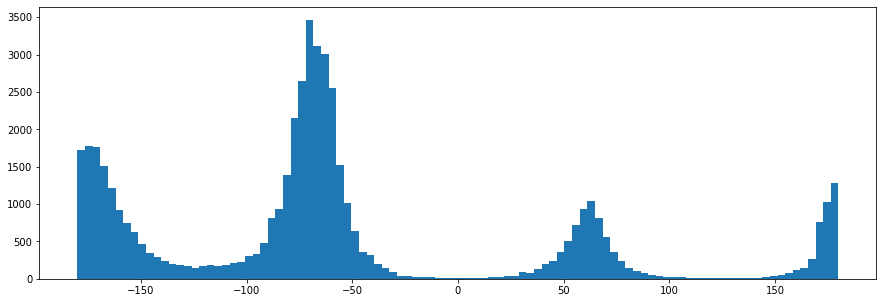

In [11]:
plt.figure(figsize=(15,5))

plt.hist(df["chi_1"],bins=100)
plt.show()

In [18]:
# ищем пики

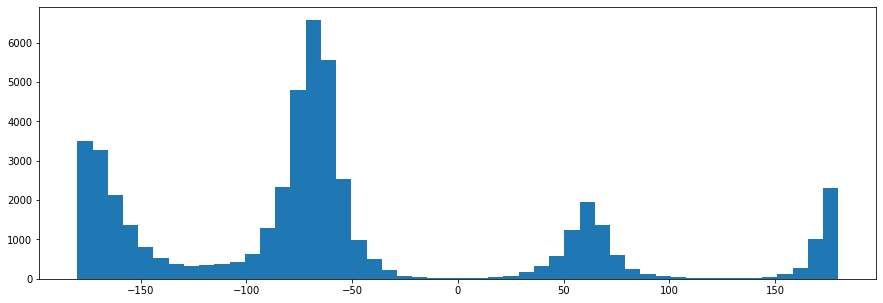

In [20]:
plt.figure(figsize=(15,5))

hs, xs, *_ = plt.hist(df["chi_1"],bins=50)
plt.show()

In [21]:
print(len(hs),len(xs))

50 51


In [22]:
xs = (xs[1:]+xs[:-1]) / 2

In [26]:
rotamers_indices = [i for i in range(3, len(hs)) 
                    if np.all(hs[i - 3:i] < hs[i]) and
                   np.all(hs[i+1 :i+4] < hs[i])]
print(rotamers_indices)

[15, 33, 49]


In [27]:
xs[rotamers_indices]

array([-68.39969108,  61.19858146, 176.39704594])

Занесите обнаруженные ротамеры в список rotamers:

In [28]:
rotamers = xs[rotamers_indices]

## Задание 1.3. Давайте разберемся, как можно дискретизировать значения (разделить их на классы). Реализуйте функцию get_class(value, rotamers), которая возвращает индекс ротамера, к которому относится значение value.

**Комментарий**: стоит вычислять расстояние от value до каждого значения из rotamers. Но не забудьте, что с точки зрения окружности $-\pi$ и $\pi$ - одно и то же!

In [32]:
def get_class(value, rotamers): # value - угол класс которого мы хотим определить
    diffs = np.abs(np.array(rotamers)-value)
    #diffs = (diffs + 2 * np.pi) % (2 * np.pi) Бесполезный костыль
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)

In [32]:
def get_class(value, rotamers): # value - угол класс которого мы хотим определить
    diffs = np.array(rotamers)-value

    return np.argmin(diffs)

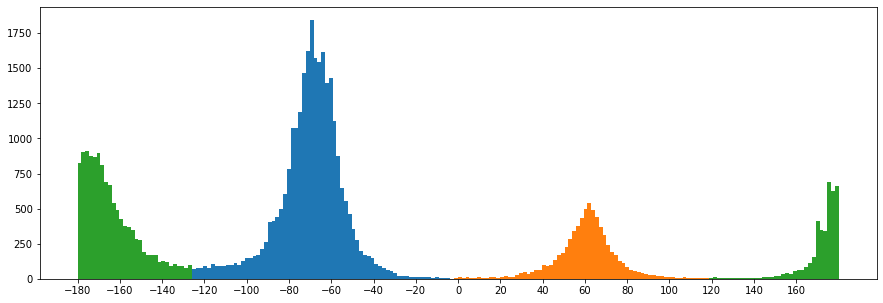

In [33]:
plt.figure(figsize=(15,5))
classes = [get_class(val, rotamers) for val in df["chi_1"]]

for i in np.unique(classes):
    plt.hist(df["chi_1"].values[classes == i], bins=200, range=(-180, 180))

plt.xticks(np.arange(-180, 180, 20))
plt.show()

## Задание 1.4. Теперь мы умеем делить значения $\chi_1$ на классы, т.е. можем понять, к какому ротамеру относится то или иное значение.
Реализуем первую часть подхода Dunbrack. Шаги:
- Разделить карту Рамачандрана на блоки $20 x 20$. Для каждого блока нужно найти те сэмплы из выборки, которые входят в него.
- Для всех найденных сэмплов нужно получить индексы классов; после этого выбрать класс, встречающийся чаще всего, и сохранить его в соответствующую ячейку матрицы **most_common_rotamers**.
    - Если получилось меньше 10 значений для некоторого блока, нужно получить наиболее частый класс для всей выборки.

In [44]:
all_rots = [get_class(val, rotamers) for val in df["chi_1"]]

df['rotamer'] = all_rots # берем значения или индексы по хи1 ?

all_un_rots, all_un_cnts = np.unique(all_rots, return_counts=True)

most_common = all_un_rots[np.argmax(all_un_cnts)]

In [40]:
most_common

0

In [58]:
most_common_rotamers = np.full((18, 18), np.nan)
for phi_ind in range(18):
    phi_st = -180 + 20 * phi_ind
    phi_end = -180 + 20 * (phi_ind + 1)
    for psi_ind in range(18):
        psi_st = -180 + 20 * psi_ind
        psi_end = -180 + 20 * (psi_ind + 1)
        
        subdf = df[(df['phi'] >= phi_st) & (df['phi'] < phi_end) &
                   (df['psi'] >= psi_st) & (df['psi'] < psi_end)]
        if len(subdf) < 10:
            most_common_rotamers[psi_ind, phi_ind] = most_common
            continue
        un_rotamers, counts = np.unique(subdf['rotamer'].values,
                               return_counts = True)
        best_rotamer_ind = np.argmax(counts)
        best_rotamer = un_rotamers[best_rotamer_ind]
        most_common_rotamers[psi_ind, phi_ind] = best_rotamer

un_rotamers - уникальные ротамеры + индексы (аргмакс по каунту)

In [48]:
un_rotamers, counts

(array([1, 2], dtype=int64), array([12,  8], dtype=int64))

In [49]:
un_rotamers[np.argmax(counts)]

1

phi*psi 18x18
nan
init+final phi&psi

Отобразите получившуюся матрицу с помощью plt.imshow: 

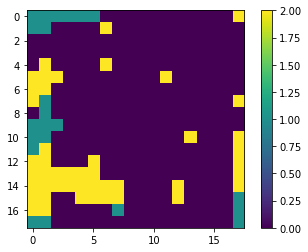

In [59]:
plt.imshow(most_common_rotamers)

plt.colorbar()
plt.show()

Какие выводы можно сделать на основании изображения выше? Можно ли сказать, что какой-то ротамер характерен для определенной вторичной структуры?

# $\rightarrow$ Ваши идеи 🙂

## Задание 1.5. А насколько вообще состоятелен подход к поиску пересечений, основанный на энергии van der Waals?

Давайте возьмем достаточно длинный белок $1Z87$, откроем его и изучим:

In [ ]:
import Bio.PDB as pdb

In [ ]:
path = pdb.PDBList().retrieve_pdb_file("1z87", 
                                       file_format="pdb")
struct = pdb.PDBParser().get_structure("s", path)

Получите 0-ую цепочку этого белка, найдите в ней индексы всех цистеинов (CYS):

In [ ]:
chain = struct[0].child_list[0]
residues = chain.child_list
cys_inds = # TODO

Выберите первый найденный цистеин. Будем менять для него угол $\chi_1$ и смотреть, как будет меняться энергия ван дер Ваальса при взаимодействии с другими атомами.

$U_{LJ} = 4 \cdot \epsilon \cdot [(\frac{r_{min}}{r})^{12} - 2 \cdot (\frac{r_{min}}{r})^6]$

In [ ]:
lj_coeffs = pd.read_csv("lennard-jones_12-6.csv", delimiter="\t")
lj_coeffs.head()

In [ ]:
def van_der_Waals(d, d_m, eps):
    return  4 * eps * (((d_m / d) ** 12) - 2 * ((d_m / d) ** 6))

Изменяя двугранный угол в пределах $[-\pi, \pi)$:
- Вычислите новые координаты атома SG у цистеина. Для этого можно воспользоваться функциями из файла geometry.py (из первого ДЗ).
- После получения координат, их можно присвоить с помощью метода:

    residue["CG"].set_coord(new_cg1_coord)
- После этого вычислите суммарную энергию ван дер Ваальса взаимодействия со всеми другими атомами белка.

In [ ]:
from geometry import *

Для удобства сделаем словарь из таблицы с коэффициентами потенциала типа Леннарда-Джонса:

In [ ]:
lj_coeffs = {row[0]: {"d_min": float(row[1].replace(",", ".")), 
                      "eps": float(row[2].replace(",", "."))} for row in lj_coeffs.values}
lj_coeffs

In [ ]:
def calc_vdw_w_residue(ref_residue, residue):
    ref_atoms = [at 
                 for at in ref_residue.child_list 
                 if at not in ["C", "N", "CA", "CB", "O"] and at.element[0] != "H"]
    atoms = [at 
             for at in residue.child_list 
             if at.element[0] != "H"]
    
    ds, d_ms, epses = [], [], []
    for at1 in ref_atoms:
        for at2 in atoms:
            pair = "{}-{}".format(at1.element, at2.element)
            ds += [at1 - at2]
            d_ms += [lj_coeffs[pair]["d_min"]]
            epses += [lj_coeffs[pair]["eps"]]
            
    ds =    np.array(ds)
    d_ms =  np.array(d_ms)
    epses = np.array(epses)
    
    return van_der_Waals(ds, d_ms, epses).sum()
    

In [ ]:
calc_vdw_w_residue(chain[2], chain[3])

In [77]:
chi1_vals = np.arange(-np.pi, np.pi, np.pi/10)

cys_residue = residues[cys_inds[0]]

chi1_true = pdb.calc_dihedral(cys_residue["N"].get_vector(),
                              cys_residue["CA"].get_vector(),
                              cys_residue["CB"].get_vector(),
                              cys_residue["SG"].get_vector(),                             
                             )
planar = pdb.calc_angle(cys_residue["CA"].get_vector(),
                      cys_residue["CB"].get_vector(),
                      cys_residue["SG"].get_vector())
bond = cys_residue["SG"] - cys_residue["CB"]
prev_atoms = np.array([cys_residue["N"].coord, 
                       cys_residue["CA"].coord, 
                       cys_residue["CB"].coord, 
                      ])

vdw_vals = []

for chi1 in chi1_vals:
    new_coord = place_next_dihedral_atom(prev_atoms, chi1, planar, bond)
    cys_residue["SG"].set_coord(new_coord)
    
    # your code here

Постройте график для получившихся значений энергии. Какой вывод можно сделать из него?

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(chi1_vals, vdw_vals)

plt.show()

In [ ]:
# your ideas here

# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [58]:
# your code here

## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [58]:
# your code here

## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера. 

In [58]:
# your code here

## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [ ]:
# Ваш pip может иметь другую версию / называться по-другому: например, pip3 для python3
! pip3.8 install lightgbm
import lightgbm as lgb

Разделите выборку на обучающую и тестовую в соотношении 0.7/0.3. В X должны быть все признаки, кроме Unnamed, pdb_id и всех столбцов со значениями углов $\chi$. y - столбец дискретизированных значений $\chi_1$.

In [58]:
# your code here

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

In [ ]:
clf = lgb.LGBMClassifier(num_leaves=88,
                         min_child_samples=1358,
                         max_depth=16,
                         n_estimators=2170,
                         reg_lambda=702.599,
                         reg_alpha=28.532,
                         learning_rate=0.26461,
                         random_state=42
                        )

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Test accuracy score:", accuracy)